# About

[Triqler](https://pubmed.ncbi.nlm.nih.gov/30482846/) is a novel software for protein quantification and differential protein identification. It uses probabilistic graphical models to generate posterior distributions for fold changes between treatment groups, highlighting uncertainty rather than hiding it. Conventional (frequentist) methods use filters and imputations to control error rate and often ignore certain error sources. This project aims to benchmark Triqler against MaxQuant (A commonly used tool for protein quantification). 

For this purpose, a data set with 10 samples containing mixtures of Arabidopsis Thaliana, Caenorhabditis Elegans and Homo Sapiens proteins are used. The concentration levels are known. Theoretically, the results from Triqler should be more representative of the de facto protein quantification, since no filters or imputations methods are used, but previous attempts at showing this fact ([here](https://patruong.github.io/bayesProtQuant/)) have shown that imputation methods could severely impact the results obtained by MaxQuant, making it look either much worse or much better by giving it an unfair advantage or disadvantage. One important aspect of this research is therefore how to make a fair comparison of Triqler and MaxQuant. Sub-tasks to answer relating to this aspect is "How do we make a fair imputation if we need to impute values?" and "How do we visualize the comparison in a meaningful and comprehensible way?".



## ToDO:
- make a write-up about details about the projects.

## 2020-11-09 Saturday

spectronautFile: ../data/500-PSSS3-raw-reformatted_dropna_dropdup_decoy_nonShared_again.csv
FDR_treshold: 0.01
Impute: None
Global_impute: False
    
triqlerFile: ../data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/proteins.XvsY.tsv
FDR_treshold: 0.01




In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
def read_in_triqler_x_vs_y_data(filename):
    #filename = "proteins.1vs4.tsv"
    f = open(filename, "r")
    cols = f.readline().split("\n")[0].split("\t")
    n_cols = len(cols)
    vals = []
    for i in f:
        val = i.split("\n")[0].split("\t")[0:n_cols-1]
        peptides = i.split("\n")[0].split("\t")[n_cols-1:]
        val.append(";".join(peptides))
        vals.append(val)
    
    return pd.DataFrame(vals, columns = cols)  

In [5]:
# Readin spectronau
file_dir = "~/git/bayesMS/data/old_data_pickled/"
spectronaut = pd.read_pickle(file_dir + "spectronaut.pkl")
# Remove decoy
spectronaut["decoy"] = spectronaut.protein.str.strip().str[:5]
spectronaut = spectronaut[spectronaut["decoy"] != "decoy"]

In [6]:
# Readin triqler 

#triqler = pd.read_pickle("triqler.pkl")
file_dir = "/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/"
filename = "proteins.2vs6.tsv" 
triqler = read_in_triqler_x_vs_y_data(file_dir + filename)#Choose the sample
triqler["specie"] = triqler.protein.str.strip().str[-5:]
# Remove decoy
triqler["decoy"] = triqler.protein.str.strip().str[:5]
triqler = triqler[triqler["decoy"] != "decoy"]


In [10]:
species = ["ARATH", "HUMAN", "CAEEL"]
cols = spectronaut.columns[3:]
cols = pd.DataFrame(cols)

#Sample S02 
specie = 2
sample = 1 # +1 on the sample

max_nan = 0 # set the number of nan
species_spec = spectronaut[spectronaut["specie"] == species[specie]]
species_spec = species_spec.set_index("protein")
start_of_sample_spectronaut = range(2,52,5) # start of samples
sample_s = species_spec.ix[:, start_of_sample_spectronaut[sample]:start_of_sample_spectronaut[sample]+5]
sample_s # 4210
sample_s = sample_s[sample_s.isnull().sum(axis=1) <= max_nan]

sample_s["mean"] =  sample_s.mean(axis=1)
sample_s["median"] = sample_s.median(axis=1)
sample_s["min"] = sample_s.min(axis=1)
sample_s["max"] = sample_s.max(axis=1)



start_of_sample_triqler = range(6,52,5) # start of samples
species_triq = triqler[triqler["specie"] == species[specie]]
species_triq = species_triq.set_index("protein")
sample_t = species_triq.ix[:, start_of_sample_triqler[sample]:start_of_sample_triqler[sample]+5]
sample_t = sample_t.astype(float)

sample_t["mean"] =  sample_t.mean(axis=1)
sample_t["median"] = sample_t.median(axis=1)
sample_t["min"] = sample_t.min(axis=1)
sample_t["max"] = sample_t.max(axis=1)

#reindex sample_t
rename_idx = dict(zip(sample_t.index, sample_t.index.str.strip().str[:-6]))
sample_t = sample_t.rename(index=rename_idx)

# Find overlapping proteins
overlap_set = sample_s.index.intersection(sample_t.index)






/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [17]:
# Random sample of n
n = 20
protein_sample = pd.DataFrame(overlap_set).sample(n)
protein_sample

sub_sample_t = sample_t.ix[protein_sample.protein]
sub_sample_s = sample_s.ix[protein_sample.protein]


#sample_s["protein"] = sample_s.index
#sample_s 
#sample_t["protein"] = sample_t.index
#sample_t

sub_sample_t["protein"] = sub_sample_t.index
sub_sample_s["protein"] = sub_sample_s.index

/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [18]:
sub_sample_t

,S02:S02_R01,S02:S02_R02,S02:S02_R03,S02:S02_R04,S02:S02_R05,mean,median,min,max,protein
protein,,,,,,,,,,
Q23205,0.9859,1.2550,1.2840,1.2040,0.7995,1.10568,1.15484,0.7995,1.2840,Q23205
Q2V0X4,0.9297,0.9930,0.9796,1.0570,0.8322,0.95830,0.96895,0.8322,1.0570,Q2V0X4
P34703,0.7671,0.7828,0.8199,0.7757,0.7439,0.77788,0.77679,0.7439,0.8199,P34703
O61793,1.6680,1.6140,1.5020,1.3250,1.4030,1.50240,1.50220,1.3250,1.6680,O61793
Q9U2V9,2.4630,2.2590,2.0090,2.1940,1.6910,2.12320,2.15860,1.6910,2.4630,Q9U2V9
G5ECL3,1.1710,0.8818,1.0340,0.9105,0.7678,0.95302,0.93176,0.7678,1.1710,G5ECL3
Q9N588,0.7893,1.7660,1.3230,1.0530,0.3292,1.05210,1.05255,0.3292,1.7660,Q9N588
Q20636,1.0430,1.0030,1.0030,1.1770,0.8978,1.02476,1.01388,0.8978,1.1770,Q20636
Q9TZC4,1.0920,1.2220,1.1830,1.1560,1.2520,1.18100,1.18200,1.0920,1.2520,Q9TZC4


Text(0.5,1,'Triqler - random samples')

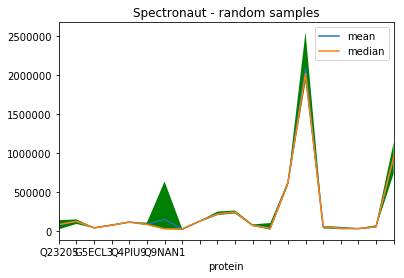

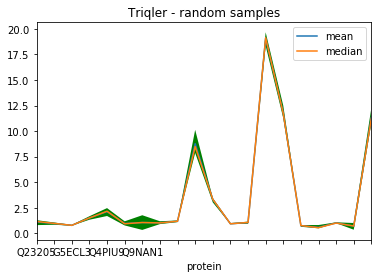

In [19]:
#Triqler is already run with a FRD treshold

#sns ts plot to to visualize diff
ax = sub_sample_s.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_s, facecolor='green')
plt.title("Spectronaut - random samples")

ax = sub_sample_t.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_t, facecolor='green')
plt.title("Triqler - random samples")


Code reads in triqler and spectronaut data. Removed decoy proteins. Compute mean, median, min, max and code plot function for mean and median (as lines) and fill-in with min-max borders. 

The code samples n random overlapping proteins from triqler and spectroanut and plots mean and median with min-max borders. 

Things to check in the code:
- Did i forget to treshold triqler data on q-values?
- What is the unit of triqler protein quantification? (Why is there a magnitude of difference)
- What was the normalization used in previous attempt? (within sample normalization, and why did that make sense?)
- Is there a better way to compare than the previous normalization?
- I guess it is between sample relationship that matter?
- Read up on spike-in proteomics? 



 
## 2020-11-06 Friday
### Data-dependent Acquisition and Data Independent Acquisition (DIA).
In data-dependent acquisition (DDA), a protein sample is digested into peptides, ionized and analyzed by mass spectrometry. Peptide signals that rise above a certain treshold (noise level) in a mass spectrum are selected for fragmentation, producing tandem mass spectra (MS/MS) that can be matched to spectra in a database. The mass spectrometer randomly samples peptides for fragmentation and is biased to pick those with strongest signal, which makes it problematic to reproducibly quantify low-abundance peptides (which could hold biological value).  

Data-independent acquisition is an approach to acquisition in Mass Spectrometry which fragments all peptides within a defined mass-to-charge (m/z) windows (as opposed to a select narrow window around "the strongest signal"). The analysis is repeated as the mass spectrometer marches up the full m/z range, which results in accurate peptide quantificaiton without being limited to profiling predefined peptied of interest.    

A potential drawback of the DIA is the existence of multiple peptides in an m/z window. The fragmentation of multiple peptides results in chimeric (multiplexed) spectra which are more complex than single peptide spectra. Procedures for deconvoluting these spectra are required. Two methods for DIA are (OpenSWATH)[https://pubmed.ncbi.nlm.nih.gov/24727770/] and (ISOQUANT)[https://www.nature.com/articles/nmeth.2767]. 


## 2020-10-20 Tuesday
### 09:15 Thoughts about how to approach the problem.
The problem was that different imputation methods could severly skew the results. How I could go about this problem is to compare different imputation methods with the result of triqler and argue why the results are bad for spectronaut and good/ok for triqler in each case. E.g. with protein counts, with boxplots etc.

One problem was that triqler had "bad" results for samples where there where low or no samples, because then the protein intensity got close to the prior, which is based on empirical means (meaning that the intensities are much higher than they should be). We could truncate the results, but in a real world case we would not know the samples so we would not be able to remove the results. 

Things to do:
- Think about how the data would be generated in real case, and perform analysis based on this.
- Think about how to handle zero samples.


## 2020-10-19 Monday

### 21:51 Starting up again. 

I just started checking into this project again. Let's start from scratch to get this correct from start. I will check through all the mails related to this.

Annotations that is good to know:
- PG - Protein Group.
- EG - Elution Group (modified peptide, including charge state).
- FG - Fragment Group (modified peptide, including charge state).

/data/Headers.xlsx - contains column info.

R.FileName is the columns for MS-measurement

### 22:21 Old mail containing relevant information.

All the data is on bose:/media/hdd/matthew/mergespec/data/spectronaut/
The files from the latest try are named PSSS3_triqler_input_renormalized.tsv (triqler input file) and PSSS3_triqler_output_proteins.<x>vs<y>.tsv

The script I used for converting the spectronaut files (they have an xls extension, but they're actually just tab separated files): https://github.com/statisticalbiotechnology/mergespec/blob/master/bin/bayesquant/convert_spectronaut_to_triqler_input.py

The version of triqler I used to generate the data is on a branch called large_scale_optimizations: https://github.com/statisticalbiotechnology/triqler/tree/large_scale_optimizations
However, I'm not entirely sure if this is the same version that I used to generate the files, since I made some changes while working on this. So, if you run triqler yourself with this branch the results might be different. 

Some issues I had to generate a report comparing Triqler to Spectronaut were:
1. we either have their original results (500-PSSS3-precursor_Report.xls), which has a column "PG.Quantity" that contain the protein concentrations, but has missing values as it has been filtered on some FDR. Alternatively, we have their results with decoys ('S500-PSSS3-equ decoy_Report.xls'), which is not filtered on FDR and does not contain missing values, but does not contain a column with the protein quantity and I don't really know how they summarized peptide quantities to protein quantities. The first option seems more reasonable, as this is what they would normally report.
2. with these original results, we have to choose a missing value strategy and this will most likely give them either an unfair disadvantage (impute row average) or an unfair advantage (impute lowest observed value). Imputing the lowest observed value seems to be most in line with the DIA approach and I already created a file with protein concentrations using this strategy (500-PSSS3-precursor_Report.proteins.tsv) which could be useful. For the Triqler results, you can use any of the PSSS3_triqler_output_proteins.<x>vs<y>.tsv (the columns we'll use don't change for different <x> and <y>) and take the columns starting with "S01:S01_R01".

Future steps:
- Sort the proteins by pearson correlation(?) between the true concentrations and predicted concentrations and create graph with the correlation on the x-axis and the number of proteins on the y-axis. Note that the protein concentrations for spectronaut are not log2 transformed, whereas the Triqler protein concentrations are log2 transformed. Also, note that the Triqler results include proteins with high identification PEP, we thus might want to filter the list of proteins on e.g. 1% protein-identification FDR. This should all be relatively easy to do.
- Check if the value of the lowest observed imputed value for the spectronaut data (currently 139.428100585938) matters, since it will most likely affect the pearson correlation, especially if we do a log2 transformation first.
- Check the influence of the number of allowed missing values. The spectronaut data does not seem to include a limit for the number of missing values, while I think I allowed up to 25 (out of 50 samples) missing values per peptide for Triqler. It's a bit hard to compare though, since the missing values for spectronaut would only work on protein level, whereas the missing values for triqler are on peptide level.

#### Correction to mail:
Small correction to the previous mail, I actually allowed up to 35 missing values for Triqler. The concentrations for the C Elegans were dropping off so fast that such a large number was necessary (https://github.com/statisticalbiotechnology/mergespec/blob/735ed743924fa705cb2c1f64509e5a1540add574/bin/bayesquant/calibration.py#L63).

Information about the normalization of the data:
It should have been normalized (locally over the RT gradient) based on the constant Arabidopsis background.

I have generated a new report with now global median normalized data (based on the identified peptides of the constant Arabidopsis background), but also added the unnormalized quantities.

Additionally, the data is FDR unfiltered. You can filter the data by PG.Qvalue (protein group FDR) and EG.Qvalue (Precursor FDR) to get only the filtered data.

And an equal number of decoy are present, can be selected by EG.IsDecoy column.

File: 500-PSSS3-equ decoy_Report-V2-raw-and-normal.zip

According to a exploratory heatmap on this mail the normalization of the data is fine. Although, I do not recall how a heatmap indicates fine normalization.

#### Some info about the data

The PG.Quantity is based on a mix of Top3 intense peptides and reproducibility of identification.

#### Answer too my question about FG.NormalizedMS2PeakArea = 1.0

My Question: "How should we interpret non-decoy peptides with FG.NormalizedMS2PeakArea = 1.0? The PG.Quantities for some of these that I have seen seems to be NaNs. For example like these FG.NormalizedMS2PeakArea."

alues of 1 can come from two sources:

In Spectronaut, small values for quantities (<1) are set to one, these arise from small noise peaks or from local normalization effects.

In both cases were the signals noise or close to noise.

It mostly arises due to the fact that the dynamic range of MS1 and MS2 are not necessarily the same.

In Spectronaut MS1 and MS2 information is used for identification and it can be that one layer is enough. So the quantitative information of the other layer can be very low.

### 22:57 How to approach this problem from my current position.

I have lot of triqler output, but it is probabily better that i redo and generate new results since I am have forgotten how these was generated, which could cause further problems down the line.

Also, I just noted that the triqler has been updated has new output options for posterior distribution. 

One remaining question is still, how to we report NaNs for the Spectronaut results.

I should also ask my PI if the PSSS3 results from last year are still relevant. 

## 2020-10-18 Sunday

Setting up a Rmarkdown log for this project. 

## Historical log
https://patruong.github.io/bayesProtQuant/